/Users/derrickvanfrausum/anaconda3/envs/mimii/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0, 0.5, 'Amplitude')

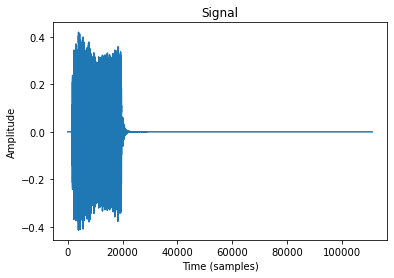

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("assets/sounds/whistle_sound.mp3")

plt.plot(y)
plt.title("Signal")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")

In [4]:
sr

22050

Text(0, 0.5, 'Amplitude')

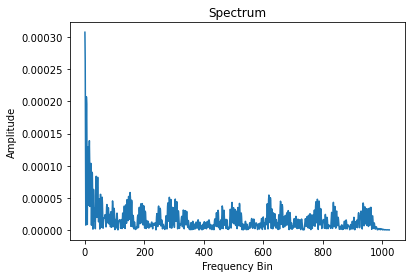

In [3]:
import numpy as np

n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length=n_fft+1))

plt.plot(ft)
plt.title("Spectrum")
plt.xlabel("Frequency Bin")
plt.ylabel("Amplitude")

/Users/derrickvanfrausum/anaconda3/envs/mimii/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/derrickvanfrausum/anaconda3/envs/mimii/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/Users/derrickvanfrausum/anaconda3/envs/mimii/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


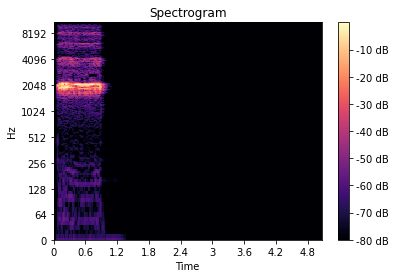

In [5]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

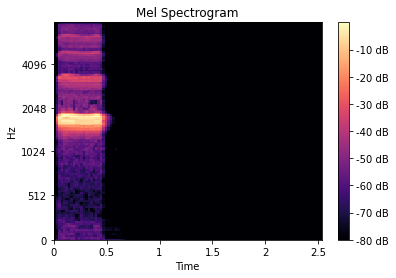

In [7]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [11]:
import pandas as pd
df = pd.DataFrame(y)
df.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111104 entries, 0 to 111103
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       111104 non-null  float32
dtypes: float32(1)
memory usage: 434.1 KB


In [18]:
df.describe()

,0
count,111104.000000
mean,0.000020
std,0.069758
min,-0.413121
25%,0.000000
50%,0.000000
75%,0.000000
max,0.419637


In [25]:
# =====================================================================
# Import
# =====================================================================

# Import internal modules
import os.path
from typing import List, Set, Dict, TypedDict, Tuple, Optional

# Import 3rd party modules
import pandas as pd

In [34]:
def get_sound_files(folder: str) -> pd.DataFrame:
    """
    Function to get all sound files within a folder.
    Param: `folder` name includes background noise level and machine type (e.g. -6_db_fan)    
    Return: a DataFrame  
    """
    # Create empty lists
    sound_list: List[str] = []  # will contain all sound filenames
    sound_path_list: List[str] = []  # will contain the sound's filepaths
    noise_db_list: List[int] = [] # will contain the background noise level in db of each sound
    machine_type_list: List[str] = [] # will contain the machine type of each sound
    model_id_list: List[str] = []  # will contain the machine product id of each sound
    target_list: List[str] = [] # will contain the target value (normal=0 or anormal=1) for each sound

    # Get the relative path of the directory that contains all the sound files
    folder_path = os.path.join("assets", "sounds", folder)

    # Get all the filenames within the directory
    for path, dirs, files in os.walk(folder_path):
        for filename in files:
            # Search only filenames with the extension ".wav"
            if filename.lower().endswith(".wav"):

                # Get the filename
                sound_list.append(filename)

                # Get the filepath
                sound_path = os.path.join(path, filename)
                sound_path_list.append(sound_path)
                
                # Split filepath to retrieve the information
                path_splitted = sound_path.split("/")
                
                # Get the background noise in db
                noise_db = int(path_splitted[2].split("_")[0])
                noise_db_list.append(noise_db)
                
                # Get the machine type
                machine_type = path_splitted[2].split("_")[2]
                machine_type_list.append(machine_type)
                
                # Get the model id
                model_id = path_splitted[3].split("_")[1]
                model_id_list.append(model_id)
                
                # Get target variable (normal or anormal)
                target = path_splitted[4]
                target_list.append(target)

    # Create a DataFrame from the lists
    return pd.DataFrame(list(zip(noise_db_list, machine_type_list, model_id_list, sound_list, sound_path_list, target_list)), 
                        columns=["noise_db", "machine_type", "model_id", "sound", "sound_path", "target"])

def get_all_sounds(db_list: List[int], machine_type_list: List[str]) -> pd.DataFrame:
    """
    Function to get all sound files for specified lists of background noise and machine type.
    Param: * `db_list` is a list of background noise level (i.e. -6, 0, 6)
           * `machine_type_list` is a list of machine type (i.e. fan, pump, valve, slider) 
    Return: a DataFrame  
    """
    df_list = []
    for db in db_list:
        for machine_type in machine_type_list:
            df = get_sound_files(f"{db}_db_{machine_type}")
            df_list.append(df)
            
    return pd.concat(df_list, axis=0)

In [40]:
df = get_all_sounds([-6, 0, 6], ["fan", "valve", "pump", "slider"])

In [41]:
df.head()

,noise_db,machine_type,model_id,sound,sound_path,target
0,-6,fan,00,00000059.wav,assets/sounds/-6_db_fan/id_00/abnormal/0000005...,abnormal
1,-6,fan,00,00000071.wav,assets/sounds/-6_db_fan/id_00/abnormal/0000007...,abnormal
2,-6,fan,00,00000065.wav,assets/sounds/-6_db_fan/id_00/abnormal/0000006...,abnormal
3,-6,fan,00,00000273.wav,assets/sounds/-6_db_fan/id_00/abnormal/0000027...,abnormal
4,-6,fan,00,00000267.wav,assets/sounds/-6_db_fan/id_00/abnormal/0000026...,abnormal


In [46]:
df[["noise_db", "machine_type", "model_id", "target"]].value_counts()

noise_db  machine_type  model_id  target  
-6        slider        02        normal      1068
 0        slider        02        normal      1068
-6        slider        00        normal      1068
 0        slider        00        normal      1068
 6        slider        02        normal      1068
                                              ... 
 0        pump          04        abnormal     100
 6        pump          04        abnormal     100
          slider        06        abnormal      89
 0        slider        06        abnormal      89
-6        slider        06        abnormal      89
Length: 96, dtype: int64
